In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [2]:
df = pd.read_csv(r'C:\Users\hrcoo\Desktop\Esate-Price\Estate Price Prediction\data\mumbai.csv')


In [3]:
df.isnull().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             3879
Status               481
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
Landmarks           3638
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [4]:
df['Furnished_status'].unique()

array([nan, 'Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [5]:
df['Furnished_status'] = df['Furnished_status'].map({'Unfurnished': 1, 'Semi-Furnished': 2, 'Furnished': 3}) #converting categorical data to numerical data


In [6]:
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\r\n\r\n\r\n Ri...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\r\n\r\n\r\n Ri...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\r\n \r\n ...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\r\n\r\n\r\n We...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,1.0,2.0,near uper govind nagar,Flat,\r\n \r\n ...,12385.321101


In [7]:
df.drop('desc', axis=1, inplace=True) #dropping description as it is not required and has many inconsistenies in data
df.drop('Landmarks', axis=1, inplace=True) #dropping landmarks as it is not required





In [8]:
df.Bathrooms.unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  0.])

In [9]:
column_names = df.columns
print(column_names)


Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'type_of_building', 'Price_sqft'],
      dtype='object')


In [10]:
df.drop('Lift', axis=1, inplace=True)
df.drop('parking', axis=1, inplace=True)

df.drop('Balcony', axis=1, inplace=True) #Dropping these columns as they have high missing values and are not important for the model
df.drop('latitude', axis=1, inplace=True)
df.drop('longitude', axis=1, inplace=True) #Dropping these columns because users do not always know the exact latitude and longitude of the house

In [11]:
df['Status'].unique()

array(['Under Construction', 'Ready to Move', nan], dtype=object)

In [12]:
df['Status'] = df['Status'].map({'Under Construction': 0, 'Ready to Move': 1})


In [13]:
df['Status'].unique()

array([ 0.,  1., nan])

In [14]:
df['Status'].fillna(df['Status'].mode()[0], inplace=True)
df['Furnished_status'].fillna(df['Furnished_status'].mode()[0], inplace=True) #Handling missing values with mode



C:\Users\hrcoo\AppData\Local\Temp\ipykernel_28968\3888164688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Status'].fillna(df['Status'].mode()[0], inplace=True)
C:\Users\hrcoo\AppData\Local\Temp\ipykernel_28968\3888164688.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [15]:
df['Status'].unique()

array([0., 1.])

In [16]:
df['type_of_building'].unique()

array(['Flat', 'Individual House'], dtype=object)

In [17]:
df['type_of_building'] = df['type_of_building'].map({'Flat': 1, 'Individual House': 2}) #converting categorical data to numerical data


In [18]:
df['type_of_building'].unique()

array([1, 2])

In [19]:
df['Address'].nunique()
df.drop('Address', axis=1, inplace=True) #Dropping address as it is not fit for the model

In [20]:
num_rows = df.shape[0]
print("Number of rows in the dataframe:", num_rows)


Number of rows in the dataframe: 6255


In [21]:
df.head()

,price,area,Bedrooms,Bathrooms,Status,neworold,Furnished_status,type_of_building,Price_sqft
0,22400000.0,629.0,2.0,2.0,0.0,New Property,1.0,1,35612.082671
1,35000000.0,974.0,3.0,2.0,0.0,New Property,1.0,1,35934.291581
2,31700000.0,968.0,3.0,3.0,0.0,New Property,1.0,1,32747.933884
3,18700000.0,629.0,2.0,2.0,1.0,New Property,1.0,1,29729.729730
4,13500000.0,1090.0,2.0,2.0,1.0,New Property,1.0,1,12385.321101


In [22]:
df['neworold'].unique()

array(['New Property', 'Resale'], dtype=object)

In [23]:
df['neworold'] = df['neworold'].map({'New Property': 2, 'Resale': 1}) #converting categorical data to numerical data

In [24]:
print(df.columns)

Index(['price', 'area', 'Bedrooms', 'Bathrooms', 'Status', 'neworold',
       'Furnished_status', 'type_of_building', 'Price_sqft'],
      dtype='object')


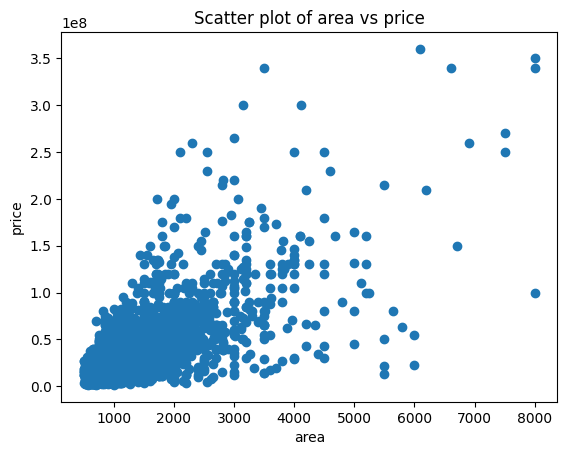

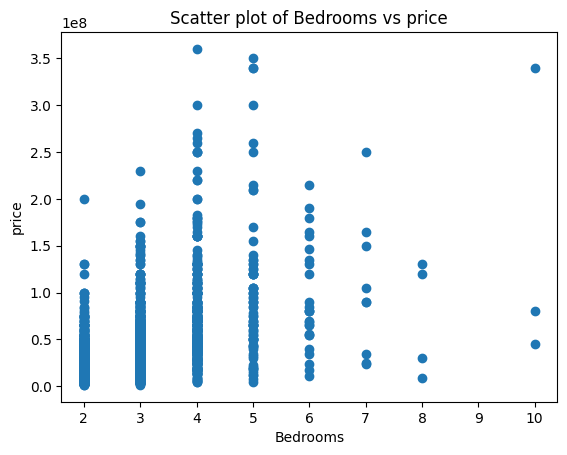

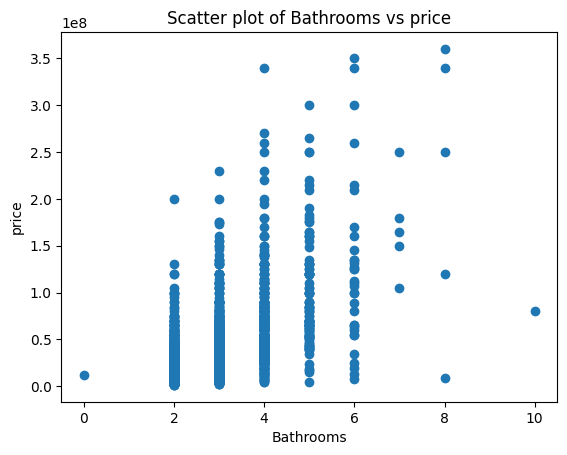

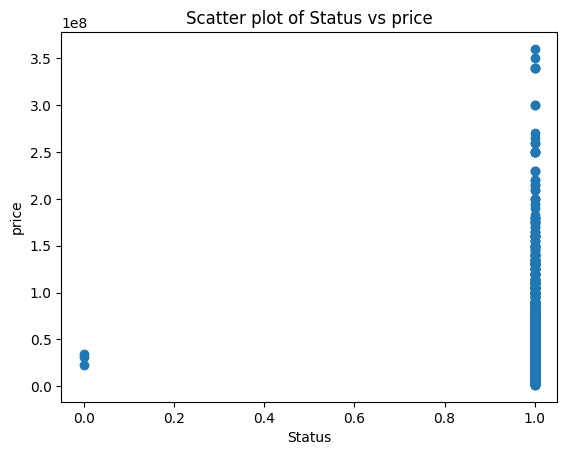

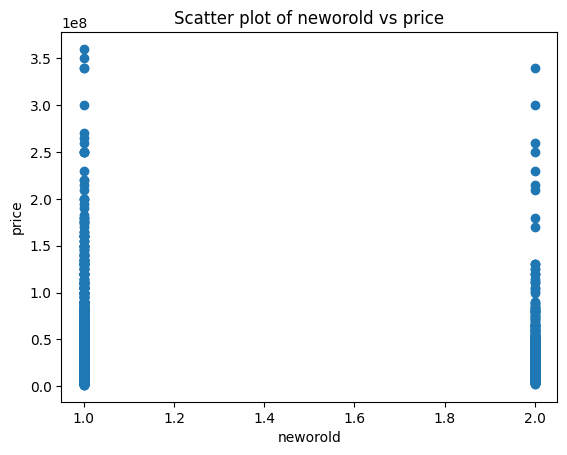

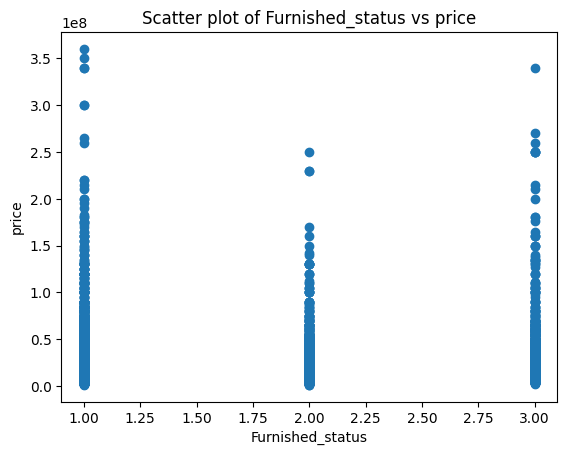

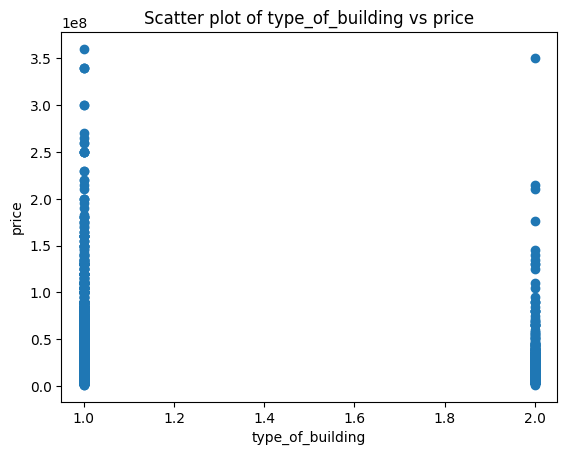

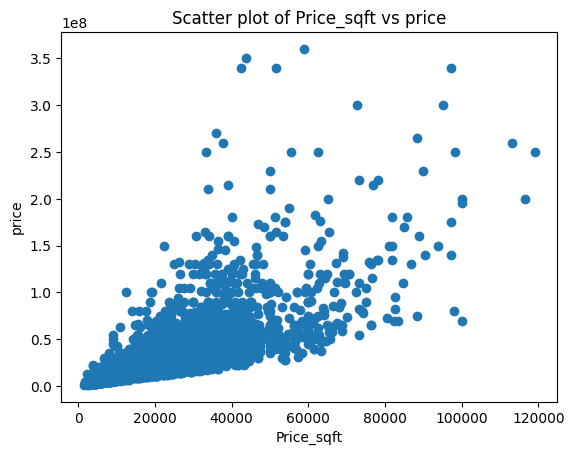

In [25]:
#inspecting relation between the features and the target variable
for feature in df.columns:
    if feature != 'price':  
        plt.scatter(df[feature], df['price'])
        plt.xlabel(feature)
        plt.ylabel('price')
        plt.title(f'Scatter plot of {feature} vs price')
        plt.show()


In [26]:
#generating correlation matrix
correlation = df.corr()['price']
print(correlation)


price               1.000000
area                0.712270
Bedrooms            0.586444
Bathrooms           0.639180
Status             -0.002245
neworold            0.037078
Furnished_status    0.065699
type_of_building    0.000008
Price_sqft          0.725421
Name: price, dtype: float64


In [27]:
df.drop('type_of_building', axis=1, inplace=True) 
df.drop('Status', axis=1, inplace=True) 
df.drop('Price_sqft', axis=1, inplace=True) #Dropping this column because if the user knows the price per square foot, they can easily calculate the price of the house defeating the purpose of the model


In [28]:
df.head()

,price,area,Bedrooms,Bathrooms,neworold,Furnished_status
0,22400000.0,629.0,2.0,2.0,2,1.0
1,35000000.0,974.0,3.0,2.0,2,1.0
2,31700000.0,968.0,3.0,3.0,2,1.0
3,18700000.0,629.0,2.0,2.0,2,1.0
4,13500000.0,1090.0,2.0,2.0,2,1.0


In [29]:
column_data_types = df.dtypes
print(column_data_types)


price               float64
area                float64
Bedrooms            float64
Bathrooms           float64
neworold              int64
Furnished_status    float64
dtype: object


In [30]:
df['Furnished_status'] = df['Furnished_status'].astype(int)
df['Bedrooms'] = df['Bedrooms'].astype(int)
df['Bathrooms'] = df['Bathrooms'].astype(int)


In [31]:
df.head()

,price,area,Bedrooms,Bathrooms,neworold,Furnished_status
0,22400000.0,629.0,2,2,2,1
1,35000000.0,974.0,3,2,2,1
2,31700000.0,968.0,3,3,2,1
3,18700000.0,629.0,2,2,2,1
4,13500000.0,1090.0,2,2,2,1


In [32]:
#Removing outliers from the dataset using z-scores

z_scores = np.abs((df - df.mean()) / df.std())
threshold = 3
outlier_indices = np.where(z_scores > threshold)
df = df.drop(outlier_indices[0])
df = df.reset_index(drop=True)


In [33]:
df.shape

(5956, 6)

In [34]:
df.to_csv(r'C:\Users\hrcoo\Desktop\Esate-Price\Estate Price Prediction\data\mumbai_cleaned.csv', index=False) #saving the cleaned data to a new csv file